In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns

plt.style.use('fivethirtyeight')

/Users/raficg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## Helper Functions

In [4]:
def get_csv(chamber, congress):
    fpath = '../congress-data/%s/%s_%d.csv' % (chamber, chamber, congress)
    cong_df = pd.read_csv(fpath, index_col=0)
    cong_df = cong_df.reset_index()
    
    cong_df['PCT'] = cong_df['missed_votes'] / cong_df['total_votes']
    
    if chamber == 'house':
        inds = cong_df['at_large'] == True
        cong_df.loc[inds, 'district'] = '0'
    
    return cong_df

# Exploring Why Representatives Miss Roll-Call Votes



## Plotting The Initial Data

5 Number Summary for the Senate
102nd Congress - 116th Congress
      | Missed Votes
------+------------
Min:  |    0
Q1:   |    17
Med:  |    35
Q3:   |    66
Max:  |    1695




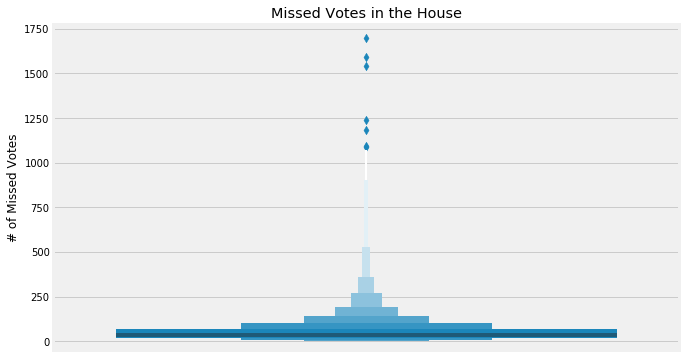

In [5]:
missed_votes = []
for session in range(102, 117):
    df = get_csv('house', session)
    missed_votes.extend(df['missed_votes'])

missed_q = np.percentile(missed_votes, [25, 50, 75])
missed_min = np.min(missed_votes)
missed_max = np.max(missed_votes)

print('5 Number Summary for the Senate')
print('102nd Congress - 116th Congress')
print('===============================')
print('      | Missed Votes')
print('------+------------')
print('Min:  |    %d' % (missed_min))
print('Q1:   |    %d' % (missed_q[0]))
print('Med:  |    %d' % (missed_q[1]))
print('Q3:   |    %d' % (missed_q[2]))
print('Max:  |    %d' % (missed_max))
print('\n')

fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxenplot(missed_votes, ax=ax, orient='v')
ax.set_title('Missed Votes in the House')
ax.set_ylabel('# of Missed Votes');

The boxenplot is similar to a box-and-whiskers plot, but provides more visual aid. From this plot, it looks like the number of missed votes tends to be relatively low--mostly less than 250 votes per session. There are several outliers that are well over 500. Let's isolate those members of Congress and see if we can learn anything

In [7]:
print('500+ Missed Votes')
print('=================')
for i in range(102, 117):
    data = get_csv('house', i)
    data = data[data['missed_votes'] > 500]
    for idx, row in data.iterrows():
        print(row['first_name'] + ' ' + row['last_name'])

500+ Missed Votes
Thomas Foley
Thomas Foley
Craig Washington
Newt Gingrich
Newt Gingrich
Henry Gonzalez
Steven Schiff
J. Dennis Hastert
J. Dennis Hastert
Richard Gephardt
J. Dennis Hastert
Lane Evans
J. Dennis Hastert
Barbara Cubin
Jo Ann Davis
Nancy Pelosi
Bobby Rush
J. Barrett
Nancy Pelosi
John Boehner
Gabrielle Giffords
Ron Paul
John Campbell
Carolyn McCarthy
John Boehner
Paul Ryan
Paul Ryan
Nancy Pelosi


A lot of the names on this list appear to all have one thing in common--many of them were at one point Speakers of the House. Perhaps the high number of missed votes correlates with being Speaker of the House?

In the past 30 years, there have only been 6 different Speakers of the House, here is a dictionary of their names and their unique identifiers:

In [12]:
names_to_ids = {'Boehner' : 'B000589', 
                'Foley' : 'F000239', 
                'Gingrich' : 'G000225', 
                'Hastert' : 'H000323', 
                'Pelosi' : 'P000197', 
                'Ryan': 'R000570'}

This dictionary contains a mapping of congressional session to Speaker of the House. We will use this to isolate the Speakers' missed votes.

In [11]:
sessions_to_ids = {103: 'F000239',
                   104: 'G000225',
                   105: 'G000225',
                   106: 'H000323',
                   107: 'H000323',
                   108: 'H000323',
                   109: 'H000323',
                   110: 'P000197',
                   111: 'P000197',
                   112: 'B000589',
                   113: 'B000589',
                   114: 'R000570',
                   115: 'R000570',
                   116: 'P000197'}

5 Number Summary for the House
103rd Congress - 116th Congress
      | Non-Speakers | Speakers
------+--------------+---------
Min:  |	     0       |	  1
Q1:   |	     17      |	  889
Med:  |	     35      |	  1072
Q3:   |	     66      |	  1222
Max:  |	     947     |	  1695




(0, 1750)

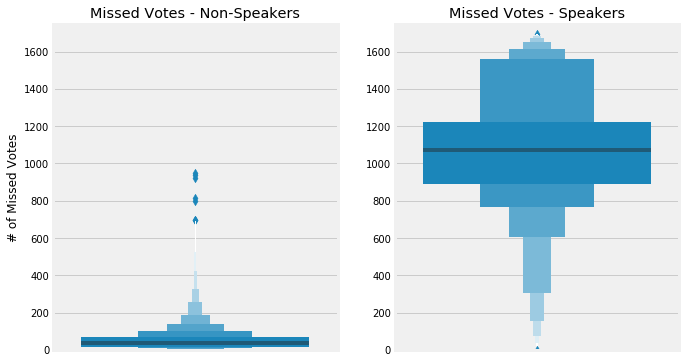

In [25]:
rep_missed_votes = []
speaker_missed_votes = []
for session in range(103, 117):
    df = get_csv('house', session)
    
    speaker = sessions_to_ids[session]
    rep_df = df[df['id'] != speaker]
    speaker_df = df[df['id'] == speaker]
    
    
    rep_missed_votes.extend(rep_df['missed_votes'])
    speaker_missed_votes.extend(speaker_df['missed_votes'])


rep_q = np.percentile(rep_missed_votes, [25, 50, 75])
rep_min = np.min(rep_missed_votes)
rep_max = np.max(rep_missed_votes)

speaker_q = np.percentile(speaker_missed_votes, [25, 50, 75])
speaker_min = np.min(speaker_missed_votes)
speaker_max = np.max(speaker_missed_votes)


print('5 Number Summary for the House')
print('103rd Congress - 116th Congress')
print('===============================')
print('      | Non-Speakers | Speakers')
print('------+--------------+---------')
print('Min:  |\t     %d       |\t  %d' % (rep_min, speaker_min))
print('Q1:   |\t     %d      |\t  %d' % (rep_q[0], speaker_q[0]))
print('Med:  |\t     %d      |\t  %d' % (rep_q[1], speaker_q[1]))
print('Q3:   |\t     %d      |\t  %d' % (rep_q[2], speaker_q[2]))
print('Max:  |\t     %d     |\t  %d' % (rep_max, speaker_max))
print('\n')

fig, ax = plt.subplots(1, 2, figsize=(10,6))
sns.boxenplot(rep_missed_votes, ax=ax[0], orient='v')
sns.boxenplot(speaker_missed_votes, ax=ax[1], orient='v')
ax[0].set_title('Missed Votes - Non-Speakers')
ax[1].set_title('Missed Votes - Speakers')
ax[0].set_ylabel('# of Missed Votes');
ax[0].set_ylim(0, 1750)
ax[1].set_ylim(0, 1750)

Based on these boxenplots, it certainly seems like there might be a trend of Speakers of the House missing more votes than usual. Let's conduct some hypothesis tests to explore this.

## Hypothesis Testing

From our exploratory data analysis, we noticed that Speakers of the House appear to miss more votes than their counterparts. Let's determine if this is statistically significant. We are going to run two hypothesis tests to confirm our intuition.

### Hypothesis Test 1
Our first hypothesis test will focus entirely on the Representatives who were at one point during their tenure a Speaker of the House. We first want to see if the mean number of votes missed by Representatives when they are Speakers of the House differs from when they are not.

Let's formally state the null hypothesis:

$$H_0: \mu_s = \mu_n$$
$$H_a: \mu_s > \mu_n$$

In these hypotheses, $\mu_s$ represents the average missed votes for Representatives when they are the Speaker of the House, and $\mu_n$ represents the average missed votes for Representatives when they are ont Speaker of the House.

In [26]:
sessions_to_ids = {103: 'F000239',
                   104: 'G000225',
                   105: 'G000225',
                   106: 'H000323',
                   107: 'H000323',
                   108: 'H000323',
                   109: 'H000323',
                   110: 'P000197',
                   111: 'P000197',
                   112: 'B000589',
                   113: 'B000589',
                   114: 'R000570',
                   115: 'R000570',
                   116: 'P000197'}


speaker_missed_votes = []
non_speaker_missed_votes = []
set_of_ids = set(['B000589', 'F000239', 'G000225', 
                'H000323', 'P000197', 'R000570'])
for session in range(103, 117):
    df = pd.read_csv('../congress-data/house/house_%d.csv' % session, index_col=0)
    
    speaker = sessions_to_ids[session]
    non_speakers = set_of_ids - set([speaker])
    
    non_speaker_df = df[df['id'].isin(non_speakers)]
    speaker_df = df[df['id'] == speaker]
    
    non_speaker_missed_votes.extend(non_speaker_df['missed_votes'].values)
    speaker_missed_votes.extend(speaker_df['missed_votes'].values)



In [27]:
print('Speaker Sample Size: %d' % (len(speaker_missed_votes)))
print('Non-Speaker Sample Size: %d' % (len(non_speaker_missed_votes)))

Speaker Sample Size: 14
Non-Speaker Sample Size: 34


Let's plot these samples in order to figure out their distribution. This will help us figure out which method of testing to use.

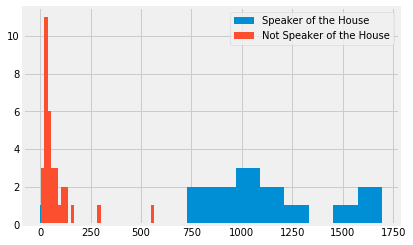

In [30]:
fig, ax = plt.subplots()
ax.hist(speaker_missed_votes, bins=14, label='Speaker of the House')
ax.hist(non_speaker_missed_votes, bins=34, label='Not Speaker of the House')
ax.legend();

Neither of these really seem to follow a normal distribution, and since the sample sizes are pretty small, it is safe to rule out using a t-test. Let's use a non-parametric test instead, the Mann-Whitney U-test.

Using the Mann-Whitney test means we should slightly adjust our null hypothesis. Now, our null hypothesis is as follows: the mean number of votes missed by Speakers of the House is equally likely to be higher than the mean number of votes missed by those same Representatives when they are not Speaker of the House, and vice versa.

Formally, our null hypothesis looks like this:

$$P(\mu_n > \mu_s) = 0.5$$

$$\mu_n = \text{Non-Speakers}$$
$$\mu_s = \text{Speakers}$$



Our p-value threshold to reject the null hypothesis will be 0.05.

In [31]:
res = scs.mannwhitneyu(speaker_missed_votes, non_speaker_missed_votes, alternative='greater')
print('p-value for mu_s < mu_n: %.2f' % res.pvalue)

p-value for mu_s < mu_n: 0.00


With a p-value of essentially 0, we can say with 95% confidence that the mean number of votes missed by Speakers of the House is higher than the mean number of votes missed when those reps are not Speakers of the House.

In other words, becoming Speaker of the House makes you more likely to miss votes.

## Hypothesis Test 2
Now that we have proved that becoming Speaker of the House makes you more likely to miss votes than when you were not Speaker, lets see if the same is true for comparing with representatives who did not become Speaker of the House.

Let's formally state the hypotheses.

$$H_0: \mu_s = \mu_r$$
$$H_a: \mu_s > \mu_r$$

In these hypotheses, $\mu_s$ represents the average missed votes Speakers of the House, and $\mu_r$ represents the average missed votes by representatives who are never Speakers.

In [35]:
speaker_ids = set(['B000589', 'F000239', 'G000225', 
                'H000323', 'P000197', 'R000570'])

rep_missed_votes = []
for session in range(103, 117):
    df = pd.read_csv('../congress-data/house/house_%d.csv' % session, index_col=0)
        
    rep_df = df[~df['id'].isin(speaker_ids)]
    rep_missed_votes.extend(rep_df['missed_votes'].values)

In [36]:
print('Speaker Sample Size: %d' % (len(speaker_missed_votes)))
print('Representatives Sample Size: %d' % (len(rep_missed_votes)))

Speaker Sample Size: 14
Representatives Sample Size: 6167


The difference in sample size is so large that we know we should use a Mann-Whitney U-Test again. But let's plot the samples anyways.

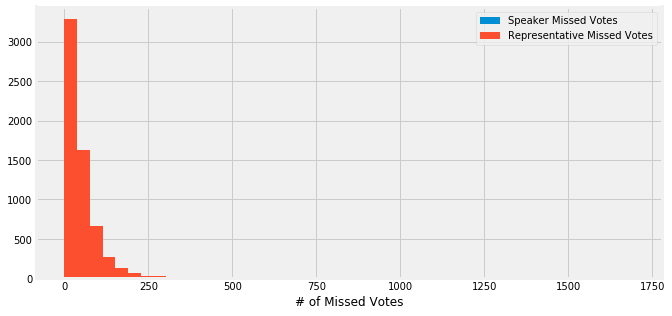

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(speaker_missed_votes, bins=25, label='Speaker Missed Votes')
ax.hist(rep_missed_votes, bins=25, label='Representative Missed Votes')
ax.legend()
ax.set_xlabel('# of Missed Votes');

The samples for candidates don't even show up on the plot! That is because they are dwarfed on the y-axis by the other sample. This confirms that we should use a Mann-Whitney U-Test. Let's readjust our null hypothesis like we did before.

$$P(\mu_r > \mu_s) = 0.5$$

$$\mu_r = \text{Other Reps}$$
$$\mu_s = \text{Speakers}$$

Our p-value threshold will again be 0.05.

In [39]:
res = scs.mannwhitneyu(speaker_missed_votes, rep_missed_votes, alternative='greater')
print('p-value for mu_r < mu_s: %.2f' % res.pvalue)

p-value for mu_r < mu_s: 0.00


With a p-value of essentially 0, we can say with 95% confidence that the mean number of votes missed by Speakers of the House is higher than the mean number of votes missed by other members of the House of Representatives.

In other words, becoming Speaker of the House makes you more likely to miss votes more often than your counterparts.

## Conclusion

The purpose of this project was to explore why a representative may miss a vote. In reality, representatives may miss votes for any reason. Perhaps they fell ill, missed a flight, or were in a meeting. It is also worth considering that this project focused on the sheer number of votes missed, but not the actual content of those bills. I would imagine that representatives tend to miss bills that are considered less important--both by their colleagues and the nation.

With that being said, it is safe to say that there is one factor that determines whether a representative will miss more votes in any give Congressional session: if they are the Speaker of the House for that session. Not only do they miss more votes that session than they have or will in other sessions, but they also miss more votes than their counterparts who are not Speakers of the House.